In [10]:
import os
import time
from tqdm import tqdm
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt

---
# Task1

Найти формулы для рассчета значений случайной величины $\xi$ с функцией распределения <br>
$F(x) = 1 - \frac{2e^{-x}+e^{-5x}}{3}$, $0 < x < \infty$

Решение:

$F(x) = 1 - \frac{2e^{-x}+e^{-5x}}{3} = \frac{2}{3}(1 - e^{-x}) + \frac{1}{3}(1 - e^{-5x})$

Положим $F_1(x) = 1 - e^{-x}$ и $F_2(x) = 1 - e^{-5x}$ - функции распределения, так как:

1. $F_1(x=0) = 0$ и $F_1(x=\infty) = 1$
2. $F_2(x=0) = 0$ и $F_2(x=\infty) = 1$

Далее поспользуемся методом обратных функций и получим:

1. $1 - e^{-\xi} = \gamma \Leftrightarrow \xi = - log(1 - \gamma)$, $\gamma \leq \frac{2}{3}$
2. $1 - e^{-5\xi} = \gamma \Leftrightarrow \xi = - \frac{log(1 - \gamma)}{5}$, $\gamma > \frac{2}{3}$

где $\gamma \sim U[0,1]$

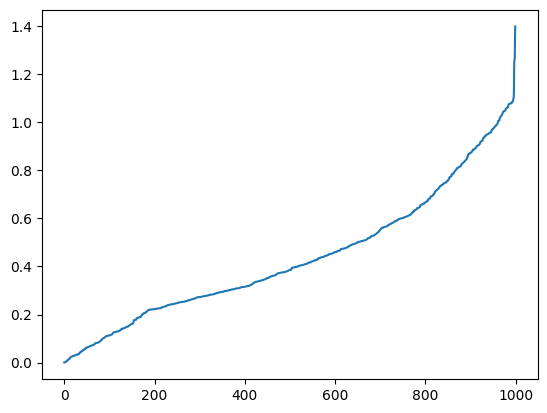

In [17]:
samples_num = 10**3

gammas = np.random.uniform(0, 1, samples_num)
random_vals = np.where(gammas > 2/3, -np.log(1 - gammas) / 5, -np.log(1-gammas))
plt.plot(np.sort(random_vals))

---
# Task2

Найти формулы для расчета значений случайных точек, равномерно распределенных в плоском кольце: <br>
$R_1^2 < x^2 + y^2 < R_2^2$

Решение:

По условию задачи, точки распределены раномерно, тогда функция плотности распределения имеет вид:

$\rho_{\xi, \eta}(x, y) = \frac{1}{\mu(x, y)} = \frac{1}{\pi(R_2^2 - R_1^2)}$

Перейдем к полярной системе координат:

$\rho_{\xi, \eta}(r, \phi) = \frac{r}{\pi(R_2^2 - R_1^2)}$

Действительно: $\int_{R_1}^{R_2}\int_0^{2\pi}\rho_{\xi, \eta}(r, \phi)drd\phi = 1$

Тогда построим плотности:

$\rho_{\xi}(r) = \int_0^{2\pi}\rho_{\xi, \eta}(r, \phi)d\phi = \frac{2\pi r}{\pi(R_2^2 - R_1^2)}$

$\rho_{\eta}(\phi\mid r) = \frac{\rho_{\xi, \eta}(r, \phi)}{\rho_{\xi}(r)} = \frac{1}{2\pi}$

Покажем, что это плостности распределений:

$\int_{R_1}^{R_2}\rho_{\xi}(r)dr = 1$ и $\int_{0}^{2\pi}\rho_{\eta}(\phi\mid r)d\phi = 1$

Найдем их функции распределений:

1. $F_\xi(r) = \int_{R_1}^r\rho_{\xi}(x)dx = \frac{r^2 - R_1^2}{R_2^2 - R_1^2}$,

где $F_\xi(r = R_1) = 0$ и $F_\xi(r = R_2) = 1$

2. $F_\eta(\phi\mid r) = \int_0^{2\pi}\rho_{\eta}(x \mid r)dx = \frac{\phi}{2\pi}$,

где $F_\eta(\phi = 0 \mid r) = 0$ и $F_\eta(\phi = 2\pi \mid r) = 1$

Тогда воспользуемся методом обратных функций и получим:

1. $\frac{\xi^2 - R_1^2}{R_2^2 - R_1^2} = \gamma_1 \Leftrightarrow \xi = \sqrt{\gamma_1(R_2^2 - R_1^2) + R_1^2}$

2. $\frac{\eta}{2\pi} = \gamma_2 \Leftrightarrow \eta = 2\gamma_2\pi$, 

где $\gamma_1,\ \gamma_2 \sim U[0,1]$

в итоге:

$\xi_x = \xi cos(\eta)$ 

$\xi_y = \xi sin(\eta)$




2.0008144511744814 2.9997921396055314


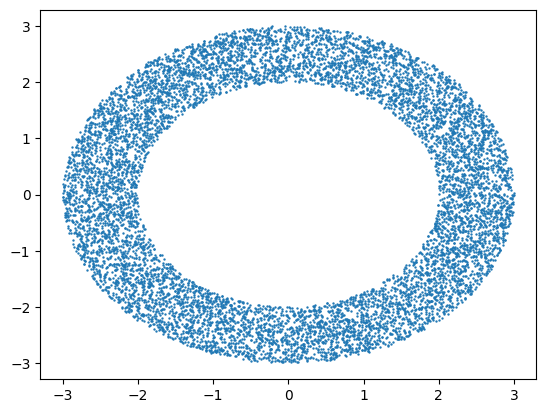

In [209]:
samples_num = 10**4
R_1 = 2
R_2 = 3

gammas_1 = np.random.uniform(0, 1, samples_num)
gammas_2 = np.random.uniform(0, 1, samples_num)


xi =  np.sqrt(gammas_1 * (R_2**2 - R_1**2) + R_1**2)
eta = 2 * np.pi * gammas_2

print(np.min(xi), np.max(xi))

xi_x = xi * np.cos(eta) 
xi_y = xi * np.sin(eta)

plt.scatter(xi_y, xi_x, s=0.5)
plt.show()

---
# Task3

Построить оценку с конечной дисперсией для вычисления интеграла: <br>

$\int_0^{\infty}x^{-\frac{5}{2}}f(x)dx$ <br>

в случае, когда $f(x) \sim x$ при $x \to \infty$ и $f(x) \sim x^2$ при $x\to0$

---
# Task4

Найти формулы для расчета интеграла

$\int_0^{\infty}f(x)e^{-kx}dx,\ k>0$,

с помощью значений случайной величины $\xi$, плотность которой задана $p(x) = \alpha e^{-\alpha x}$.

Доказать, что если $f(x) \approx Ax^n$, то диспресия будет наименьшей при $\alpha = \alpha_0 \approx \frac{k}{n+1}$.

---
# Task 5

Найти в $R^{20}$ площадь поверхности 20-мерной сферы радиуса 1 с относительной погрешностью менее 1е-9


Решение:

Аналитическая формула для рассчета площади поверхности n-мерной сферы имеет вид:

$S_n(R) = \frac{2\pi^{\frac{n}{2}}R^{n-1}}{\Gamma(\frac{n}{2})}$, где $\Gamma(x)$ - Гамма функция

from: https://www.phys.uconn.edu/~rozman/Courses/P2400_17S/downloads/nsphere.pdf

Объем n-мерной сферы радиуса r пропорционален $r^n$: $V_n(r) = v(n)r^n$, 

где $v(n)$ - объем единичной n-мерной сферы

Площадь поверхности n-мерной сферы радиуса r пропорцинальная $r^{n-1}$: $S_n(r) = s(n)r^{n-1}$,

где $s(n)$ - площадь поверхности единичной n-мерной сферы

если представить объем сферы как вложенные тонкие сферы толщины dr, то $dV_n(r) = S_n(r)dr$.

Тогда объем и площадь поверхности n-мерной сферы радиуса r связаны следующим образом:

$V_n(R) = \int_0^RS_n(r)dr = s(n)\int_0^Rr^{n-1}dr = \frac{s(n)}{n}R^n$

Таким образом, объем и площадь поверхности единичной n-мерной сферы связаны соотношением:

$v(n) = \frac{s(n)}{n}$.

Потому разыграем с помощью метода Монте Карло объем 20-мерной сферы и найдем из него плозадб поверхности.

Аналитически объем 20-мерной сферы:

$v(20) = \frac{\pi^{10}}{\Gamma(10 + 1)} = \frac{\pi^{10}}{10!} \approx 0.025$

Аналитическая площадь поверхности 20-мерной сферы:

$s(20) = \frac{2\pi^{10}}{\Gamma(10)} = \frac{2\pi^{10}}{9!} \approx 0.516$


In [4]:
def n_dim_sphere_area(n: int, r = 1.):
    x = 2 * np.pi ** (n // 2)
    for i in range(1, n // 2, 1):
        x /= i
    return x * r**(n-1)

In [5]:
n_dim_sphere_area(10)

25.50164039877345

In [267]:
sq_size = 2
dims = 20
points_num = 10**5
inside = 0
repeates = 10**5

for j in tqdm(range(repeates)):
    points = np.random.uniform(-1, 1, size=(points_num, dims))
    distances = np.sqrt((points**2).sum(axis=1))
    inside += np.where(distances <= 1, 1, 0).sum()

    simplex = np.where(np.sum(points, axis=1) <= 1, 1, 0).sum()

inside /= simplex # points_num * repeates
print(inside, simplex)
print(inside * sq_size ** dims * dims)



100%|██████████| 100000/100000 [20:41<00:00, 80.53it/s] 

0.0038106945298094653 65080
79916.05654578979


объем правильного симплекса с единичной стороной равен $\frac{\sqrt{n+1}}{n!2^{\frac{n}{2}}}$

In [271]:
dims_factorial = 1
for i in range(2, dims+1):
    dims_factorial *= i

simplex_vol = np.sqrt(dims + 1) / dims_factorial / 2**(dims / 2)
simplex_vol

1.839437660072166e-21

In [269]:
inside

0.0038106945298094653

# Latin Hypercube samples

$V_i^{(j)}=\frac{\pi_i(j)-1-U_i^{j}}{K}$, $i=\overline{1,d}$, $j=\overline{1, K}$,


где $\pi_i(j)$ - permutations of $\{1,..., K\}$

In [268]:
from itertools import permutations

In [ ]:
K = 20
N = 10

indeces = list(permutations([i for i in range(1, K+1)]))

u = np.random(0, 1, N)


In [6]:
inside * sq_size ** dims * dims - n_dim_sphere_area(20)

0.006053020199719095

1. To generate random points within an n-dimensional simplex, you can use the following method:
 Generate n independent random numbers $u_1, u_2, ..., u_n$ that are uniformly distributed in the interval 

3. Sort the $u_i$ in ascending order to get $u_{(1)} \leq u_{(2)} \leq ... \leq u_{(n)}$, where $u_{(i)}$ is the $i$-th order statistic

2. Define the coordinates of the random point $\mathbf{x} = (x_1, x_2, ..., x_n)$ within the simplex as:

$x_1 = u_{(1)}$
$x_i = u_{(i)} - u_{(i-1)}$ for $i = 2, 3, ..., n$
$x_{n+1} = 1 - u_{(n)}$

This ensures that the coordinates are non-negative and sum to 1, which are the properties of barycentric coordinates within a simplex

4. The point $\mathbf{x}$ is now a random point uniformly distributed within the n-dimensional simplex

This method generates random points by first creating $n$ independent uniform random numbers, sorting them, and then using the differences between the sorted numbers as the coordinates of the point within the simplex

The key idea is to exploit the properties of order statistics and barycentric coordinates to ensure that the generated points are uniformly distributed within the simplex















In [264]:
d = 20
N = 10

u = np.random.uniform(0, 1, (N, d))
u = np.sort(u, axis=1)

for i in range(1, d-1):
    u[:, i] = u[:, i] - u[:,i-1]

u[:,d-1] = 1 - u[:, -1]

u.sum(axis=1)

array([5.1289569 , 4.59556728, 4.6923812 , 4.29655544, 4.92277136,
       6.14133715, 4.69331536, 3.74895104, 4.77469035, 4.11471479])

# Dropped Coordinates Method

In [251]:


d = 20
N = 10**5

u = np.random.normal(0, 1, (N, d+2))
norm = np.sum(u**2, axis=1) ** (0.5)
u = u / np.expand_dims(norm, axis=1)
x = u[:, :d]

print(x.shape)
np.where((x**2).sum(axis=1)<=1, 1, 0).sum()

(100000, 20)


100000

---
# Task 6

Реализовать вычисление премии (payoff) европейского call option c постоянной волатильностью $\sigma$ c помощью метода (квази-)Монте-Карло, используя в качестве 1-мерной последовательности:

1. Реализацию $\eta\sim N(0,1)$
2. Реализацию $\gamma \sim U[0,1]$ и моделирование $N(0,1)$
3. Псевдослучайную последовательность Ван дер Корпута и моделирование $N(0,1)$

Визуально представить сравнительный анализ результатов (быстродействие, скорость сходимости). Сравнить результаты со значением, получаемым по точной формуле Блэка-Шоулза.

In [232]:
r = 0.12
sigma = 0.1
S0 = 50
K = 50
T = 1
steps = 100
num_trajectories = 10**4

$c(t,S(t)) = S(0)\Phi(\alpha_{+})-Ke^{-rt}\Phi(\alpha_{-})$

тогда 

$payoff = S(0)\Phi(\alpha_{+})e^{rt}-K\Phi(\alpha_{-})$

$\alpha_{\pm}=\frac{1}{\sigma\sqrt{\tau}}[\ln{\frac{S(t)}{K}} + (r\pm\frac{\sigma^2}{2})\tau]$

In [211]:
def payoff_straight(S0, K, r, sigma, T) -> float:
    alpha_pl = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / sigma / np.sqrt(T)
    alpha_ms = (np.log(S0 / K) + (r - sigma**2 / 2) * T) / sigma / np.sqrt(T)
    payoff = S0 * norm.cdf(alpha_pl) * np.exp(r * T) - K * norm.cdf(alpha_ms)
    return payoff


payoff_straight(S0, K, r, sigma, T)

6.6724500018536474

In [212]:
payoff = 0
repeates = 1000

for i in tqdm(range(repeates)):
    S = np.ones(num_trajectories) * S0

    for _ in range(steps):
        S = S * np.exp((r - sigma**2 / 2) * (1 / steps) + sigma * np.sqrt(1 / steps) * np.random.normal(size=num_trajectories))

    payoff += np.where(S > K, S-K, 0).mean()

payoff_simple = payoff / repeates
print(payoff_simple)

100%|██████████| 1000/1000 [00:20<00:00, 48.25it/s]

6.674722177360643


### Box-Muller algorithm

if $Z \sim N(0, I_2)$, then:

1. $R = Z_1^2 + Z_2^2$ is exponentially distributed with mean 2, i.e. $P(R \leq x) = 1 - e^{-x/2}$
2. given R, the point $(Z_1, Z_2)$ is unifirmly distributed on the circle of radius $\sqrt{R}$ centered at the origin

R - имеет экспоненциальное распределение со матожиданием 2, тогда $R = -2log(\gamma),\ \gamma\sim U[0,1]$

In [109]:
def Box_Muller_random_normal_var(N: int) -> np.ndarray:
    """
        N, int - the amount of random variable to generate
    """
    # generate a radius
    r = -2*np.log(np.random.uniform(0, 1, N // 2))
    phi = 2 * np.pi * np.random.uniform(0, 1, N // 2)

    return np.concatenate((np.sqrt(r)*np.cos(phi), np.sqrt(r)*np.sin(phi)))

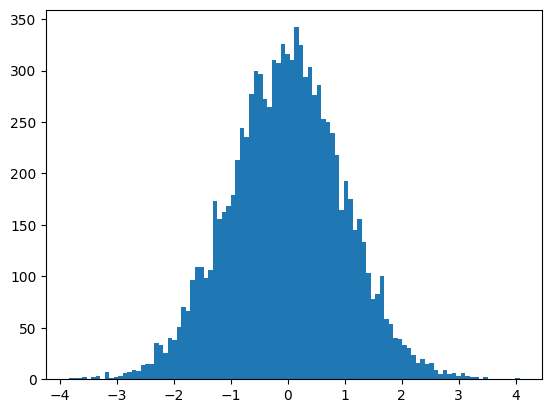

In [110]:
plt.hist(Box_Muller_random_normal_var(10**4), bins=100)
plt.show()

In [213]:
payoff = 0
repeates = 10**3

for i in tqdm(range(repeates)):
    
    S = np.ones(num_trajectories) * S0

    for _ in range(steps):
        random_vars = Box_Muller_random_normal_var(num_trajectories)

        S = S * np.exp((r - sigma**2 / 2) * (1 / steps) + sigma * np.sqrt(1 / steps) * random_vars)

    payoff += np.where(S > K, S-K, 0).mean()

payoff_box_muller = payoff / repeates
print(payoff_box_muller)

100%|██████████| 1000/1000 [00:21<00:00, 46.48it/s]

6.671301714390708


In [106]:
def Marsaglia_Bray_random_normal_vars(N: int) -> np.ndarray:
    """
    
    """
    vars = []
    for _ in range(N // 2):
        X = 10
        while X > 1:
            u1, u2 = np.random.uniform(-1, 1, 2)
            X = u1 ** 2 + u2 ** 2
        y = np.sqrt(-2*np.log(X) / X)
        vars.append(u1*y)
        vars.append(u2*y)
    return np.array(vars)

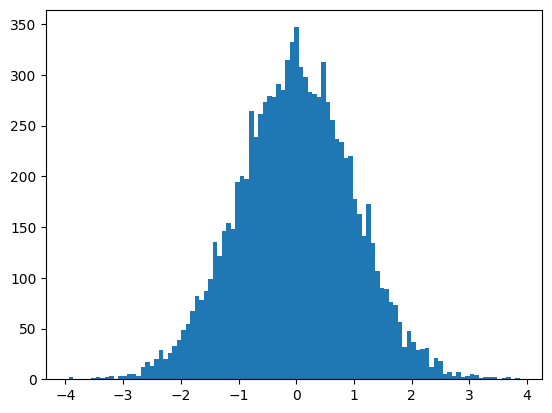

In [107]:
plt.hist(Marsaglia_Bray_random_normal_vars(10**4), bins=100)
plt.show()

In [118]:
payoff = 0
repeates = 10**2

for i in tqdm(range(repeates)):
    
    S = np.ones(num_trajectories) * S0

    for _ in range(steps):
        random_vars = Marsaglia_Bray_random_normal_vars(num_trajectories)
        S = S * np.exp((r - sigma**2 / 2) * (1 / steps) + sigma * np.sqrt(1 / steps) * random_vars)

    payoff += np.where(S > K, S-K, 0).mean()

payoff_marsagli_bray = payoff / repeates
print(payoff_marsagli_bray)

100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

2.9718122597548216


Van der Corput



In [240]:
def Van_der_Corput_uniform_distr(N, start=1):
    
    nums = [bin(i) for i in range (start, N+1)]

    def make_seq(r):
        return sum([int(num) * 2**(i) for i, num in enumerate(r)]) / (2 ** (len(r)))

    return np.array(list(map(make_seq, list(map(lambda x: x.replace('0b', ''), nums)))))

def Box_Muller_random_normal_var_via_Van_Der_Corput(N):
    
    uniform_vars = Van_der_Corput_uniform_distr(N)

    r = -2*np.log(uniform_vars)
    phi = np.linspace(0, 2*np.pi, N)
    # phi = 2 * np.pi * Van_der_Corput_uniform_distr(3*N, 2*N)[:-1]

    return np.concatenate((np.sqrt(r)*np.cos(phi), np.sqrt(r)*np.sin(phi)))

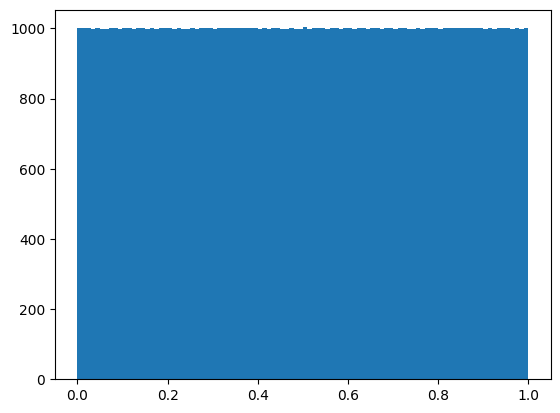

In [241]:
plt.hist(Van_der_Corput_uniform_distr(10**5), bins=100)
plt.show()

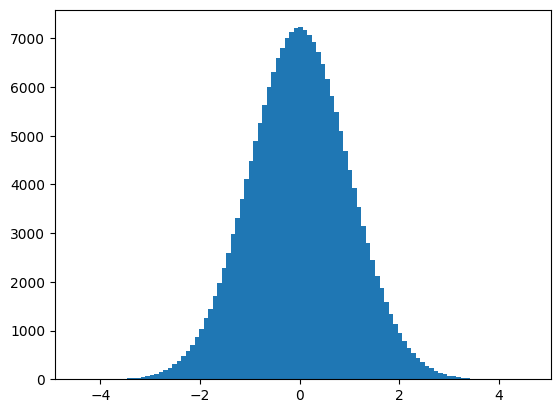

In [242]:
plt.hist(Box_Muller_random_normal_var_via_Van_Der_Corput(10**5), bins=100)
plt.show()

In [230]:
payoff = 0
repeates = 10**1
num_trajectories = 10**5

for i in tqdm(range(repeates)):
    
    S = np.ones(num_trajectories*2) * S0

    for _ in range(steps):
        random_vars = np.array(Box_Muller_random_normal_var_via_Van_Der_Corput(num_trajectories))

        S = S * np.exp((r - sigma**2 / 2) * (1 / steps) + sigma * np.sqrt(1 / steps) * random_vars)

    payoff += np.where(S > K, S-K, 0).mean()

payoff_van_der_corput = payoff / 10 / repeates
print(payoff_van_der_corput)

100%|██████████| 10/10 [03:07<00:00, 18.73s/it]

5.295860016603667


In [231]:
payoff_box_muller - payoff_simple

-1.3788621607569755

---
# Task 7

Реализовать вычисление премии (payoff) европейского call-option с непостоянной волатильностью $\tilde{\sigma} = \tilde{\sigma(S(t))}$ с помощью метода (квази-)Монте-Карло, используя в качестве d-мерной последовательности:

1. случайную последовательность с распределением $N^d(0,1)$
2. псевдослучайную последовательность Халтона и моделирование $N^d(0,1)$
3. псевдослучайную последовательность Хаммерсли и моделирование $N^d(0,1)$
4. псевдослучайную последовательность Кронекера и моделирование $N^d(0,1)$
5. псевдослучайную последовательность Фора и моделирование $N^d(0,1)$
6. псевдослучайную последовательность Соболя и моделирование $N^d(0,1)$

Модель Хестона - стохастическая модель динамики цена актива с непостоянной волатильностью, описываемая системой стохастический уравнений:

$dS(t) = \mu S(t)dt + \sqrt{\nu(t)}S(t)dW_t^s$

$d\nu(t) = k(\theta - \nu(t))dt+\xi\sqrt{\nu(t)}dW_t^v$,

где $dW_t^s$ и $dW_t^v$ - винеровские процессы с корреляцией $\rho$


Будем строить траетории итеративно:

$S(t+1) = S(t)e^{(r - \frac{\nu_t}{2})dt + \sqrt{\nu_t}dW_t^s}$

$\nu(t+1)=\nu_t + k(\theta - \nu_t)dt + \xi\sqrt{\nu_t}dW_t^v$

In [274]:
mu = 0.1
k = 0.3
theta = 0.1
rho = 0.25
xi = 0.2

N = 10**2

# create covatience matrix of BM
sigma = np.array([[1, rho], [rho, 1]])

# we need both BM to have zero expectation
expectations = np.zeros(2)

# generate BM
W = np.random.multivariate_normal(expectations, sigma, N)
print(W.shape)

(100, 2)


---
# Task 8

Реализовать вычисление премии (payoff) азиатского call-option при постоянной волатильности $\sigma$ с помощью (квази-)Монте-Карло, используя те же d-мерные последовательности, как в предыдущей задаче. Размерность d последовательности совпадает с длиной разбиения временного отрезка [0, T].

Визуально представить сравнительный анализ результатов (быстродействие, скорость сходимости)

In [ ]:
r = 0.12
sigma = 0.1
S0 = 50
K = 70
steps =1
num_trajectories = 1000